# Question:
When is there the most competition for buying houses in the DC area?

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [137]:
fairfax_zips = ["22003 (Annandale)", "22041 (Baileys Crossroads)", "22307 (Belle Haven)", "22015 (Burke)", "20120 (Centreville)", "20121 (Centreville)", "20124 (Centreville)", "20151 (Chantilly)", "22039 (Crosspointe)", "22027 (Dunn Loring)", "22033 (Fair Oaks)", "22035 (Fairfax)", "22060 (Fort Belvoir)", "22308 (Fort Hunt)", "22066 (Great Falls)", "20170 (Herndon)", "22303 (Huntington)", "22306 (Hybla Valley)", "22043 (Idylwood)", "22032 (Kings Park West)", "22315 (Kingstowne)",
                "22312 (Lincolnia)", "22079 (Lorton)", "22101 (McLean)", "20171 (McNair)", "22031 (Merrifield)", "22153 (Newington Forest)", "22151 (North Springfield)", "22124 (Oakton)", "22181 (Oakton)", "20190 (Reston)", "20191 (Reston)", "20194 (Reston)", "22310 (Rose Hill)", "22044 (Seven Corners)", "22150 (Springfield)", "22102 (Tysons Corner)", "22180 (Vienna)", "22185 (Vienna)", "22042 (West Falls Church)", "22152 (West Springfield)", "22182 (Wolf Trap)", "22309 (Woodlawn)"]

fairfax_zips = [x[0:5] for x in fairfax_zips]

In [138]:
data = pd.read_csv("Sale_Counts_Zip.csv")

In [139]:
def process_zillow_data(df, zipcodes):
    df = df[df.RegionName.isin(zipcodes)].T
    
    df.columns = df.loc["RegionName"]
    df = df.reset_index()
    df['date'] = pd.to_datetime(df['index'], errors="coerce")

    df.set_index("date", inplace=True)
    return df

# Format and save to CSV 

In [140]:
fairfax_ts = process_zillow_data(data, fairfax_zips)

fairfax_ts = fairfax_ts[~fairfax_ts.index.isna()]
fairfax_ts.drop("index", inplace=True, axis=1)

fairfax_ts.to_csv("./TEST.csv", index=True)

## Load in saved data

In [141]:
ts_data = pd.read_csv("./TEST.csv")
ts_data.date = pd.to_datetime(ts_data.date)
ts_data.set_index("date", inplace=True)

# PLOTTING

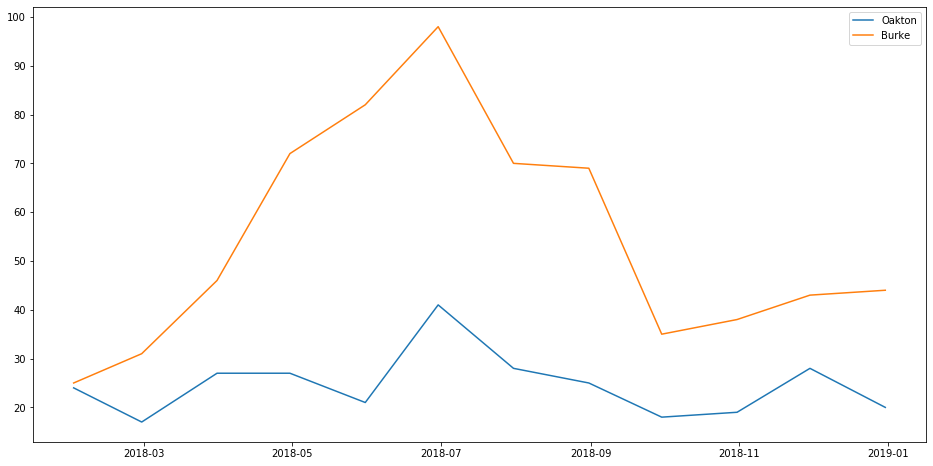

In [142]:
plot_data = ts_data["2018":"2018"]

plot_data = plot_data.resample("M").mean()

oakton_zip = "22124"
burke_zip = "22015"

plt.figure(figsize=(16, 8))

plt.plot(plot_data.index, plot_data[[oakton_zip, burke_zip]])

plt.legend(["Oakton", "Burke"])

# plt.show()